In [1]:
import tensorflow as tf
print('Tensorflow Version:{}'.format(tf.__version__))

Tensorflow Version:2.0.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
#数据结构(train_image, train_lable), (test_image, test_lable)

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

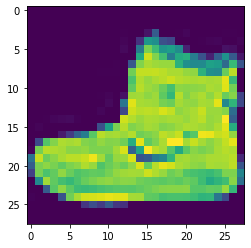

In [6]:
plt.imshow(train_image[0])

In [7]:
np.max(train_image[0])

255

In [8]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_image = train_image/255
test_image = test_image/255    #数据归一化

In [10]:
train_image.shape

(60000, 28, 28)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成28*28的一维向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), #调用keras中adam优化方法可以设置学习速率，建议0.001
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']
)

In [14]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4993 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3758 - acc: 0.8638
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3374 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3117 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2951 - acc: 0.8914


In [15]:
model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34321005882024763, 0.8779]

In [16]:
train_label   #数字标记分类时，采用sparse_categorical_crossentropy,二进制向量标记时采用categorical_crossentropy


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)   #keras中转换为独热编码的方法
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [18]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #变成28*28的一维向量
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [21]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']
)

In [22]:
model.fit(train_image, train_label_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4917 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3734 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3371 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3125 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2950 - acc: 0.8911


In [23]:
test_image.shape

(10000, 28, 28)

In [24]:
predict = model.predict(test_image)
predict.shape

(10000, 10)

In [25]:
predict[0]  #对test样本1好的预测值，所有分量和为100%

array([4.8900788e-06, 1.0931706e-08, 7.7653550e-07, 2.7281897e-07,
       1.7962515e-07, 6.0127005e-03, 1.0442350e-05, 5.7088278e-02,
       4.0887586e-05, 9.3684161e-01], dtype=float32)

In [26]:
np.argmax(predict[0]) #最大分量

9

In [27]:
test_label[0]  #测试集的正确答案与预测答案一致

9

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #增加隐藏层
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))                        #添加Dropout层每次随机丢弃50%的神经元，抑制过拟合
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [38]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']
)

In [39]:
history = model.fit(train_image, train_label_onehot, 
                    epochs=10,
                   validation_data=(test_image, test_label_onehot))  #添加在测试集上的表现

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8862 - acc: 0.6714 - val_loss: 0.5296 - val_acc: 0.7960
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.6245 - acc: 0.7792 - val_loss: 0.4869 - val_acc: 0.8212
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5664 - acc: 0.8007 - val_loss: 0.4655 - val_acc: 0.8356
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5461 - acc: 0.8090 - val_loss: 0.4502 - val_acc: 0.8436
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5287 - acc: 0.8149 - val_loss: 0.4301 - val_acc: 0.8435
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5191 - acc: 0.8195 - val_loss: 0.4297 - val_acc: 0.8474
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5059 - acc: 0.8228 - val_lo

In [40]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

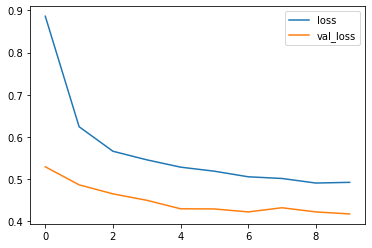

In [41]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

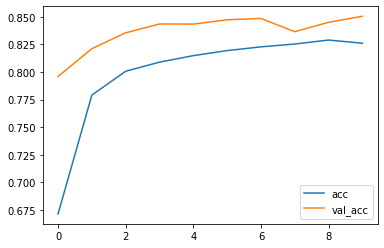

In [42]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()

过拟合，在训练集上的准确率很高，在测试数据上得分相差较大，甚至很低，说明发生了过拟合

欠拟合，在训练集和测试集上得分都很低

In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  #增加隐藏层
model.add(tf.keras.layers.Dense(32, activation='relu'))  #在Dense层可以添加kernal_regularizer正则化项
model.add(tf.keras.layers.Dense(10, activation='softmax')) #概率型激活函数softmax，多分类器输出

In [44]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']
)

In [45]:
history = model.fit(train_image, train_label_onehot, 
                    epochs=10,
                   validation_data=(test_image, test_label_onehot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5515 - acc: 0.8106 - val_loss: 0.4697 - val_acc: 0.8313
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4150 - acc: 0.8520 - val_loss: 0.4332 - val_acc: 0.8466
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3817 - acc: 0.8647 - val_loss: 0.4331 - val_acc: 0.8484
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3590 - acc: 0.8711 - val_loss: 0.4198 - val_acc: 0.8509
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3460 - acc: 0.8759 - val_loss: 0.3928 - val_acc: 0.8603
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3305 - acc: 0.8799 - val_loss: 0.3789 - val_acc: 0.8677
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3222 - acc: 0.8831 - val_loss: 0.

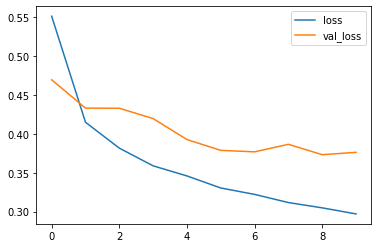

In [46]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

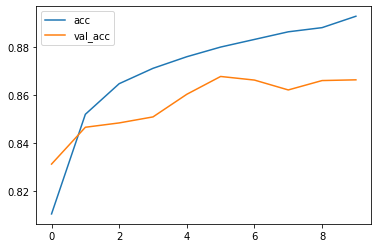

In [47]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()